# Analysis of Supermart Grocery Sales

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [3]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
df.shape

(9994, 11)

In [5]:
df.columns.tolist()

['Order ID',
 'Customer Name',
 'Category',
 'Sub Category',
 'City',
 'Order Date',
 'Region',
 'Sales',
 'Discount',
 'Profit',
 'State']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [7]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [8]:
#Checking the null values
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [9]:
#Returns unique value in each column
df.nunique()

Order ID         9994
Customer Name      50
Category            7
Sub Category       23
City               24
Order Date       1236
Region              5
Sales            1989
Discount           26
Profit           8380
State               1
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
# Correcting the format of date
def parse_date(date_str):
    for fmt in ('%m/%d/%Y', '%Y-%m-%d', '%d-%m-%Y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    raise ValueError(f"no valid date format found for {date_str}")

# Apply the function to the 'Order Date' column
df['Order Date'] = df['Order Date'].apply(parse_date)

In [12]:
# Format dates as 'dd-mm-yyyy'
df['Order Date'] = df['Order Date'].dt.strftime('%d-%m-%Y')

In [13]:
df.head(3)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu


In [14]:
df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,24-12-2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,16-10-2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,17-04-2018,West,1034,0.28,165.44,Tamil Nadu


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [16]:
new_file = df.to_csv('new_Supermart Grocery Sales.csv', index = False)

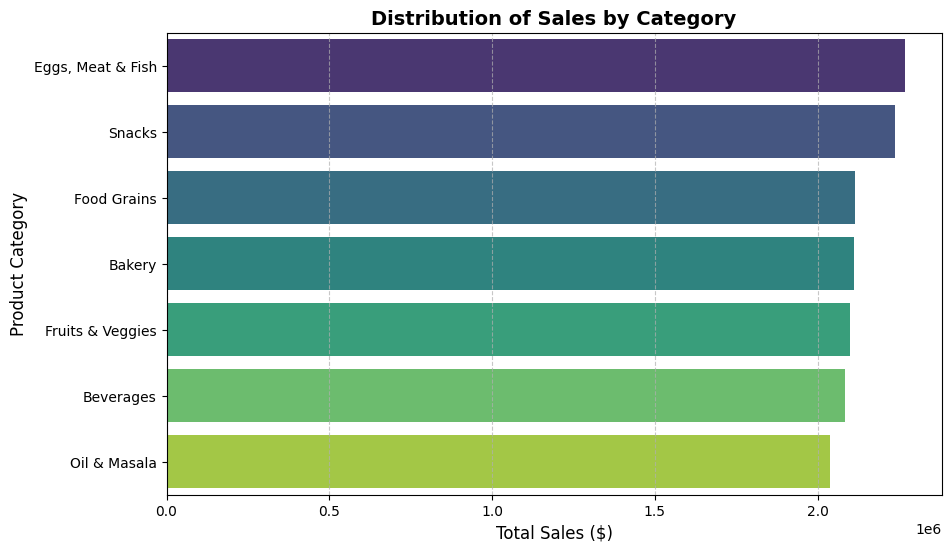

In [17]:
# Group sales by category
category_sales = df.groupby("Category")["Sales"].sum().reset_index()

# Sort categories by sales
category_sales = category_sales.sort_values(by="Sales", ascending=False)

# Plot Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(x="Sales", y="Category", data=category_sales, hue="Category",palette="viridis") # palette="viridis" is used for the color of bars.

plt.xlabel("Total Sales ($)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Distribution of Sales by Category", fontsize=14, fontweight="bold")

plt.grid(axis="x", linestyle="--", alpha=0.7) # alpha is the shade(dark or light) of grid lines.
plt.show()

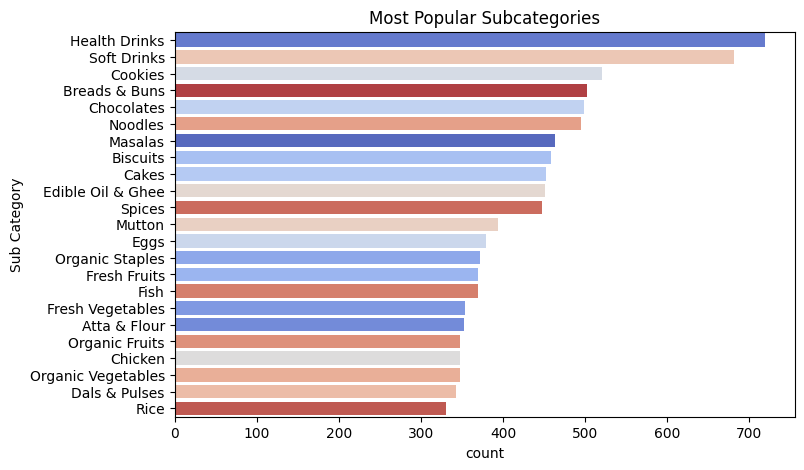

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(y="Sub Category", data=df, order=df['Sub Category'].value_counts().index, hue="Sub Category", palette="coolwarm")
plt.legend([],[], frameon=False)  # Hide the legend
plt.title("Most Popular Subcategories")
plt.show()

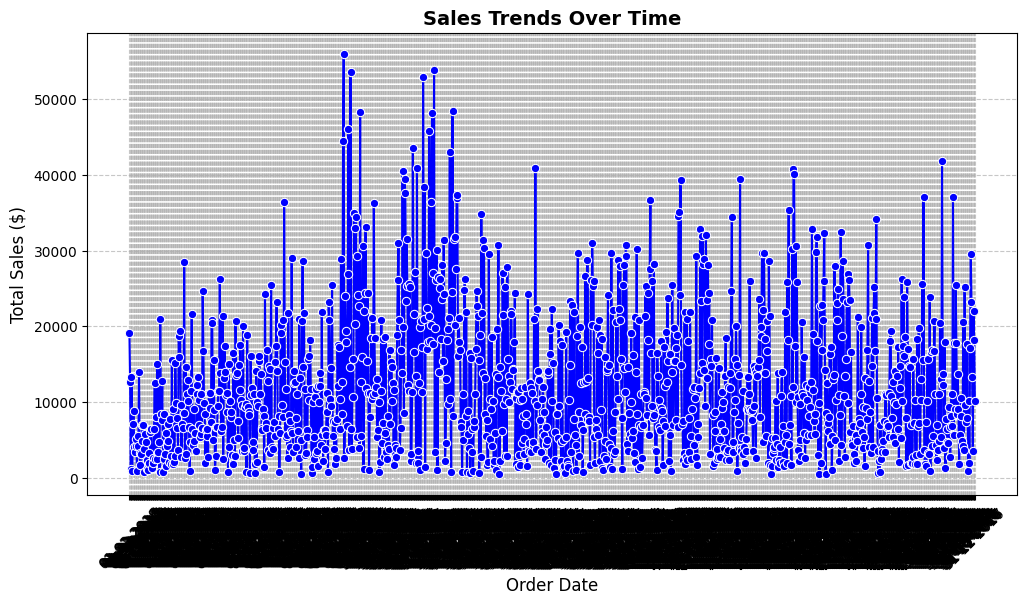

In [20]:
# Group by Date and sum total sales
sales_trend = df.groupby("Order Date")["Sales"].sum().reset_index()

# Plot Line Chart
plt.figure(figsize=(12,6))
sns.lineplot(x="Order Date", y="Sales", data=sales_trend, marker="o", color="b")

plt.xlabel("Order Date", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.title("Sales Trends Over Time", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()

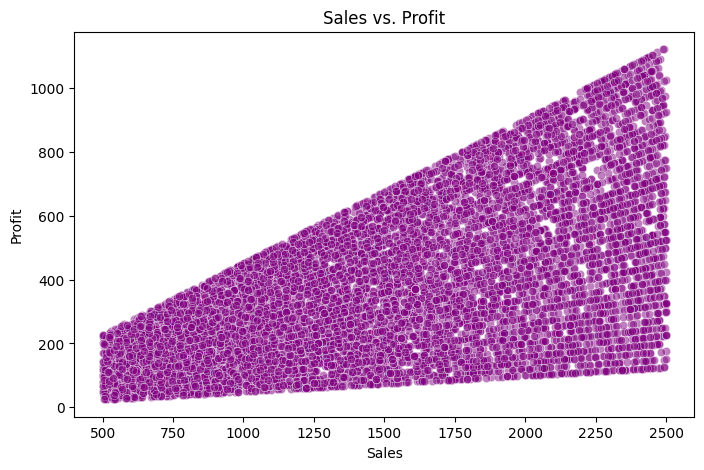

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Sales'], y=df['Profit'], alpha=0.5, color="purple")
plt.title("Sales vs. Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


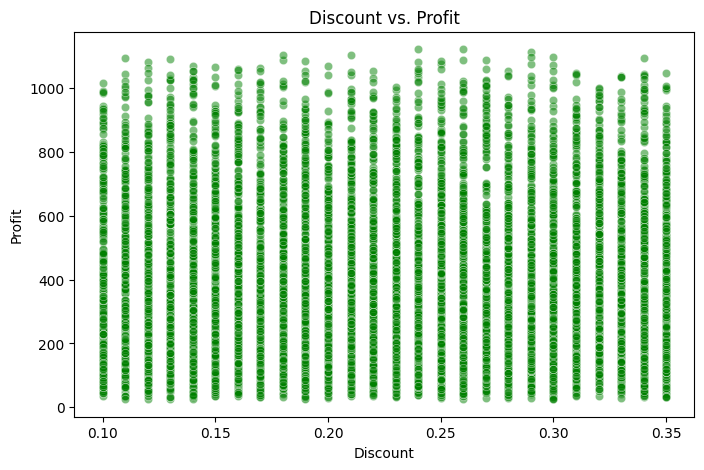

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Discount'], y=df['Profit'], alpha=0.5, color="green")
plt.title("Discount vs. Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

C:\Users\Shyam Pokar\AppData\Local\Temp\ipykernel_20444\1707521090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Region'].value_counts().index, y=df['Region'].value_counts().values, palette="magma")


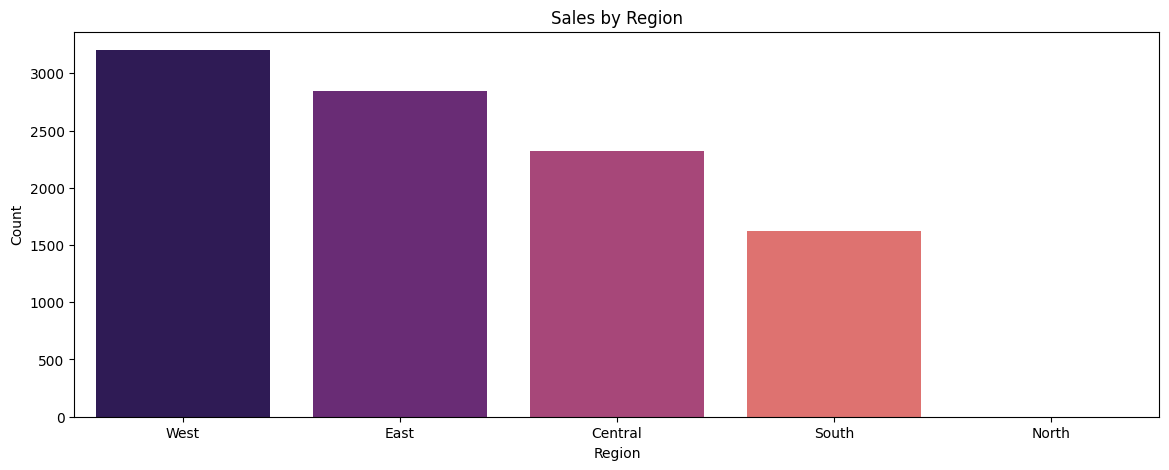

In [23]:
plt.figure(figsize=(14, 5))
sns.barplot(x=df['Region'].value_counts().index, y=df['Region'].value_counts().values, palette="magma")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

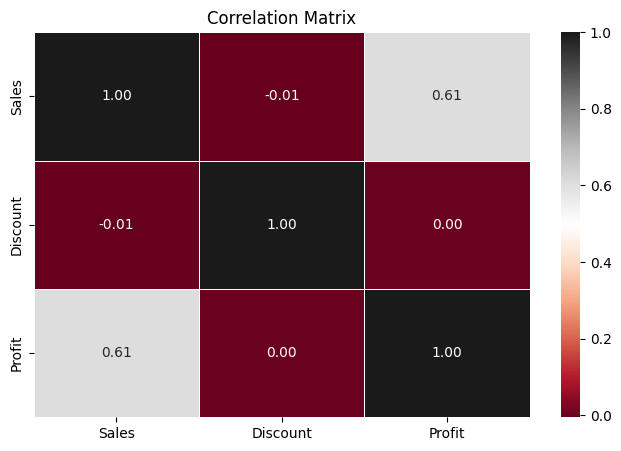

In [25]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='RdGy', fmt=".2f", linewidths=0.5) # annot will give labels inside the boxs.
plt.title('Correlation Matrix')
plt.show()

In [178]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()

In [180]:
# Encode categorical variables
df['Category'] = le.fit_transform(df['Category'])
df['Sub Category'] = le.fit_transform(df['Sub Category'])
df['City'] = le.fit_transform(df['City'])
df['Region'] = le.fit_transform(df['Region'])
df['State'] = le.fit_transform(df['State'])
df['Order Date'] = le.fit_transform(df['Order Date'])

In [185]:
# Select features and target variable
features = df.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales', 'Order Date'])
target = df['Sales']

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [193]:
 # Feature scaling
 scaler = StandardScaler()
 X_train = scaler.fit_transform(X_train)
 X_test = scaler.transform(X_test)

In [196]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [216]:
# Make predictions
y_pred = model.predict(X_test)

In [202]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [203]:
mse

212824.5973664153

In [204]:
r2

0.3547183704729946

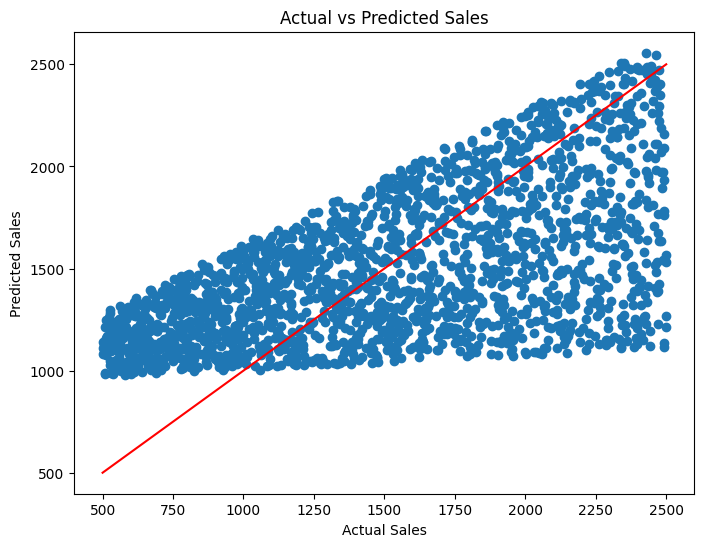

In [211]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()